In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [30]:
# Leer los datos de sismos
# Datos extraidos de https://sish.sgc.gov.co/visor/sesionServlet?metodo=irAEpicentrosTodos&idDepartamento=&idMunicipio=&cuadranteXMin=&cuadranteXMax=&cuadranteYMin=&cuadranteYMax=
df = pd.read_csv('sismicidad_historica_1.csv', encoding='latin-1')
print(df.head())
print(df.describe())
print(df.info())

   No       Fecha Hora local  Epicentro Latitud  Epicentro Longitud  \
0   1  1644/01/16      05:00               7.37              -72.64   
1   2  1644/03/16      12:00               4.46              -74.04   
2   3  1646/04/03      02:00               5.52              -74.13   
3   4  1736/02/02      09:00               2.50              -76.50   
4   5  1743/10/18      10:45               4.44              -73.83   

                                    Autor Epicentro  Magnitud Magnitud Tipo  \
0                     Servicio Geológico Colombiano       6.5            MW   
1  Dimat&eacute, C.. Rivera L.. Cisternas A. (2005)       5.5            MW   
2                     Servicio Geológico Colombiano       6.0            MW   
3                     Servicio Geológico Colombiano       6.0            MW   
4                     Servicio Geológico Colombiano       6.2            MW   

                  Autor Magnitud  Profundidad              Autor Profundidad  \
0  Servicio Geológ

In [14]:
# Generar datos
dates = df['Fecha']
values = df['Magnitud']
ts = pd.Series(values.values, index=dates)
print(dates)
print(values)
print(ts)

0     1644/01/16
1     1644/03/16
2     1646/04/03
3     1736/02/02
4     1743/10/18
         ...    
78    2014/10/20
79    2015/03/10
80    2016/10/30
81    2020/04/15
82    2023/08/17
Name: Fecha, Length: 83, dtype: object
0     6.5
1     5.5
2     6.0
3     6.0
4     6.2
     ... 
78    5.8
79    6.4
80    5.3
81    5.8
82    6.1
Name: Magnitud, Length: 83, dtype: float64
Fecha
1644/01/16    6.5
1644/03/16    5.5
1646/04/03    6.0
1736/02/02    6.0
1743/10/18    6.2
             ... 
2014/10/20    5.8
2015/03/10    6.4
2016/10/30    5.3
2020/04/15    5.8
2023/08/17    6.1
Length: 83, dtype: float64


In [21]:
# Dividir los datos en entrenamiento y prueba
train_data = ts[:'1805/06/16']
test_data = ts['1807/02/17':]
print('train data', train_data)
print('test data',test_data)

train data Fecha
1644/01/16    6.5
1644/03/16    5.5
1646/04/03    6.0
1736/02/02    6.0
1743/10/18    6.2
1766/07/09    6.5
1785/07/12    7.1
1796/02/15    5.5
1805/06/16    6.1
dtype: float64
test data Fecha
1807/02/17    5.5
1826/06/17    6.5
1827/11/16    7.1
1834/01/20    6.7
1834/05/22    6.4
             ... 
2014/10/20    5.8
2015/03/10    6.4
2016/10/30    5.3
2020/04/15    5.8
2023/08/17    6.1
Length: 74, dtype: float64


In [22]:
# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

In [23]:
#  Realizar el pronóstico
forecast = model_fit.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


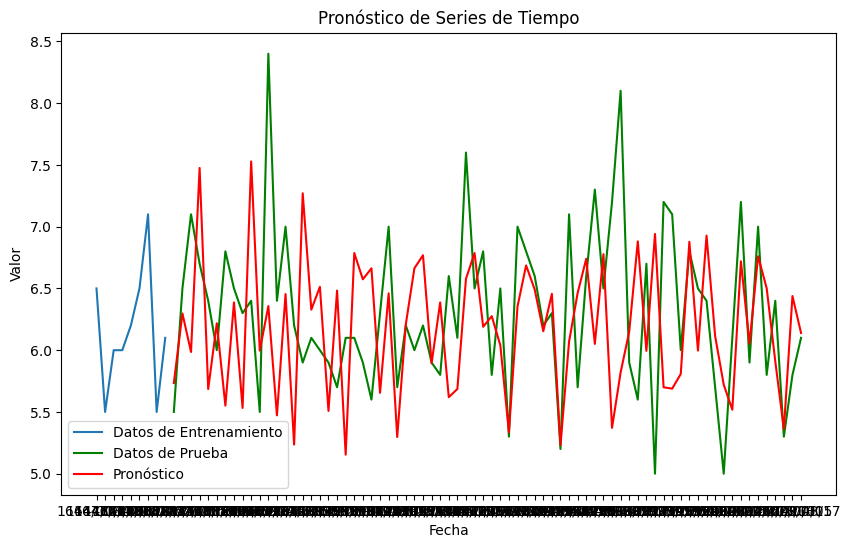

In [24]:
# Se visualizan los datos originales y el pronóstico
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba', color='green')
plt.plot(test_data.index, forecast, label='Pronóstico', color= 'red')
plt.legend()
plt.title('Pronóstico de Series de Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()